In [112]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder

In [113]:
data = pd.read_csv("resultat.csv")
data.columns

Index(['id', 'object', 'result_position', 'annonce_id', 'agency_id',
       'agency_page', 'agency_contact_name', 'agency_img_url',
       'agency_phone_number', 'agency_has_email', 'agency_link', 'address',
       'area', 'bedrooms_count', 'business_unit', 'coownership_annual_charges',
       'coownership_number_of_lots', 'coownership_is_syndic_procedure',
       'contact_is_private_seller', 'contact_email', 'description', 'district',
       'dpe', 'estate_type', 'electricity_consumption', 'estate_type_id',
       'features', 'ges', 'gas_emissions', 'highlighting_level', 'insee_code',
       'is_exclusive', 'is_redirected', 'is_expired', 'latitude', 'longitude',
       'monthly_price', 'main_picture', 'nature', 'postal_code', 'position',
       'picture_count', 'price', 'price_per_meter', 'photos',
       'price_decrease_percent', 'publication_id', 'pricing_price_note', 'ref',
       'rooms', 'short_description', 'transaction_type', 'title', 'tags',
       'url', 'video_url', 'virtual

In [114]:
a = data.columns
for i in a:
    print(i)
    display(data[i].value_counts())

id


id
678761     5
4793574    5
4793801    5
4793869    5
4794140    5
          ..
4785542    1
4809231    1
4717177    1
4643339    1
4785831    1
Name: count, Length: 1157, dtype: int64

object


object
result    4769
Name: count, dtype: int64

result_position


result_position
331     6
322     6
221     6
178     6
297     6
       ..
1038    1
1048    1
1049    1
1039    1
1044    1
Name: count, Length: 1049, dtype: int64

annonce_id


annonce_id
182171885    5
211629517    5
211733747    5
211051621    5
211195439    5
            ..
211675687    1
211814963    1
211379383    1
211460329    1
210513023    1
Name: count, Length: 1157, dtype: int64

agency_id


agency_id
8798      253
506743    126
52836     113
117455     94
116383     90
         ... 
87770       1
78034       1
165672      1
107223      1
511383      1
Name: count, Length: 439, dtype: int64

agency_page


agency_page
https://www.seloger.com/professionnels/agences-immobilieres/montpellier-3-34000/agence-70171/                 253
https://www.seloger.com/professionnels/agences-immobilieres/paris-2eme-arrondissement-75002/agence-278407/    126
https://www.seloger.com/professionnels/agences-immobilieres/st-cloud-92210/agence-3351/                       113
https://www.seloger.com/professionnels/agences-immobilieres/dijon-21000/agence-69516/                          94
https://www.seloger.com/professionnels/agences-immobilieres/paris-9eme-arrondissement-75009/agence-21789/      90
                                                                                                             ... 
https://www.seloger.com/professionnels/agences-immobilieres/paris-2eme-arrondissement-75002/agence-34335/       1
https://www.seloger.com/professionnels/agences-immobilieres/issy-les-moulineaux-92130/agence-62093/             1
https://www.seloger.com/professionnels/agences-immobilieres/la-garenne-colom

agency_contact_name


agency_contact_name
CDC HABITAT                 253
YFRI pour CSO               126
White Bird - Trodé          113
IMODIRECT                    94
OIKO GESTION                 90
                           ... 
GUY HOQUET IMMOBILIER         1
KALSTONE                      1
GROUPE IMMO PARTNERS          1
Agence Martin Côté Seine      1
PLEIADES ESTATE               1
Name: count, Length: 428, dtype: int64

agency_img_url


agency_img_url
https://v.seloger.com/s/width/150/logos/1/5/m/r/15mr2o5n7g79pgj5th66spo93dzvtg0j4c2qepvlh.jpg     253
https://v.seloger.com/s/width/150/logos/1/l/e/x/1lexxthty9dqfqe77q4mng7lhurdqd7hbpaf2o8ym.jpg     113
https://v.seloger.com/s/height/150/logos/1/z/f/u/1zfuog6a9c7fsclvou7brs7z3xs7ntylb3ubt9z6d.jpg     94
https://v.seloger.com/s/width/150/logos/1/d/m/s/1dmsnt7dz5vbxbvck34vsovp57bv4yhmimb1kaphc.jpg      90
https://v.seloger.com/s/width/75/logos/1/y/1/e/1y1enty6rd88dbufwm6etu6agp268lrrkuu2uepvk.jpg       84
                                                                                                 ... 
https://v.seloger.com/s/width/150/logos/0/1/l/r/01lrqhml9fowpvzvvcercrz17p42d4br8k5kmgy1w.jpg       1
https://v.seloger.com/s/width/150/logos/0/i/k/a/0ikalcvis347x3ea9b7h4ubr51s8kw2rf8i5rq9xc.jpg       1
https://v.seloger.com/s/width/150/logos/1/c/m/3/1cm32swq31i77mugqqyzkh2z2z2jrnpyxbjof6080.jpg       1
https://v.seloger.com/s/width/150/logos/1/l/k/3/1lk381xo0rh0tr30v2s

agency_phone_number


agency_phone_number
09 72 15 17 78    118
01 46 02 47 72    113
09 72 15 15 10     94
01 87 65 24 53     84
01 40 70 95 10     83
                 ... 
01 46 44 40 00      1
01 70 21 28 99      1
06 49 22 53 21      1
06 68 34 00 84      1
06 13 56 20 62      1
Name: count, Length: 488, dtype: int64

agency_has_email


agency_has_email
t    4764
f       5
Name: count, dtype: int64

agency_link


agency_link
https://www.cdc-habitat.fr/                               253
https://www.whitebird.immo/                               113
http://www.imodirect.com/                                  94
https://www.oikogestion.fr/                                90
http://www.alma-immobilier.com/                            83
                                                         ... 
http://www.stephaneplazaimmobilier.com/                     1
http://www.guyhoquet-immobilier-brie-comte-robert.com/      1
http://ww.floriloge.com/                                    1
https://kalstone.fr/                                        1
http://www.neogestimmo.fr/                                  1
Name: count, Length: 321, dtype: int64

address


address
Paris 16ème             393
Paris 8ème              237
Clichy                  191
Paris 17ème             166
Versailles              149
                       ... 
Courcouronnes             1
Boussy-Saint-Antoine      1
Chalifert                 1
Ris-Orangis               1
Menucourt                 1
Name: count, Length: 242, dtype: int64

area


area
100.000000    43
15.068493     32
50.000000     28
62.500000     24
30.000000     22
              ..
28.333333      1
53.166667      1
39.800000      1
23.913043      1
37.941176      1
Name: count, Length: 988, dtype: int64

bedrooms_count


bedrooms_count
0.0    1838
2.0    1131
1.0     888
3.0     632
4.0     195
5.0      18
6.0       5
Name: count, dtype: int64

business_unit


business_unit
1    4276
5     493
Name: count, dtype: int64

coownership_annual_charges


coownership_annual_charges
0.0       602
1200.0     10
960.0       9
4800.0      9
4080.0      9
1680.0      9
2100.0      8
2040.0      6
4500.0      5
2073.0      5
4392.0      5
1090.0      5
6284.0      5
200.0       5
1560.0      5
2620.0      4
900.0       4
840.0       4
720.0       4
1000.0      4
2784.0      4
2844.0      4
2500.0      4
2940.0      4
2400.0      4
1500.0      3
2683.0      2
2950.0      1
1320.0      1
600.0       1
1176.0      1
935.0       1
2964.0      1
890.0       1
Name: count, dtype: int64

coownership_number_of_lots


coownership_number_of_lots
0.0       217
85.0       29
8.0        14
14.0       13
40.0       11
4.0        10
60.0        9
84.0        9
25.0        5
6.0         5
32.0        5
394.0       5
10.0        5
196.0       5
74.0        5
180.0       5
12.0        5
57.0        4
33.0        4
100.0       4
3127.0      4
18.0        4
82.0        4
150.0       4
207.0       4
11.0        4
1.0         4
357.0       4
200.0       4
250.0       4
395.0       3
5.0         3
2635.0      3
912.0       2
24.0        1
50.0        1
52.0        1
Name: count, dtype: int64

coownership_is_syndic_procedure


coownership_is_syndic_procedure
f    3493
t       9
Name: count, dtype: int64

contact_is_private_seller


contact_is_private_seller
f    4769
Name: count, dtype: int64

contact_email


contact_email
t    4764
Name: count, dtype: int64

description


description
[FR] COMMENT FONCTIONNE ROOMLESS ? Roomless est une plateforme en ligne pour les locations à moyen et long terme qui a été créée pour garantir la tranquillité du locataire : nous vérifions toutes les appartements et les photos sont récentes et fiables, vous pouvez donc réserver en ligne en toute confiance pour éviter que quelqu'un d'autre ne le fasse avant vous. Pour réserver en ligne, suivez le lien ci-dessus et cliquez sur 'Louer maintenant'. Si vous avez besoin d'aide, contactez-nous et nous vous assisterons.  Chambre individuelle disponible à Créteil Dans l'appartement il y a 13 salles de bains . L'appartement a une surface totale de 350 mètres carrés L'appartement peut accueillir jusqu'à 16 locataires. L'appartement est meublé et dispose des services suivants : WiFi, Place de parking , Emplacement vélo, Bureau, Armoire, Machine à laver, Douche, Jardin, Terrasse, Porte blindée, Salon, Lave-vaisselle, Four, Congélateur, Plaque de cuisson, Frigo, Télévision, Chauffage cen

district


district
Centre Ville                    161
Porte Dauphine                   88
Triangle d'Or                    76
Chaillot                         66
Muette Nord                      63
                               ... 
Réveil Matin                      1
Bac-Bécon-Flachat-Colombes        1
Domaine National du Château       1
Charles de Gaulle-Gambetta        1
Bel Air-Grands Pêchers-Renan      1
Name: count, Length: 395, dtype: int64

dpe


dpe
D    836
E    565
C    532
F    218
B    217
G     75
A     68
Name: count, dtype: int64

estate_type


estate_type
Appartement    3890
Studio          771
Duplex          104
Triplex           4
Name: count, dtype: int64

electricity_consumption


electricity_consumption
164.0    39
60.0     39
80.0     34
165.0    34
69.0     32
         ..
50.0      1
276.0     1
114.0     1
161.0     1
267.0     1
Name: count, Length: 282, dtype: int64

estate_type_id


estate_type_id
1    4769
Name: count, dtype: int64

features


features
Construit en 2023, Dispo le 01/01/2024, Parking, Ascenseur, Chauffage collectif au gaz                                                                                                                              51
Terrasse, Jardin, Calme, Pas d'ascenseur, Gardien, Cuisine équipée, 13 salles de bain (baignoire), Entrée séparée, Chauffage collectif                                                                              36
Balcon, Ascenseur, Salle de bain (baignoire), Salle d'eau (douche), Toilettes, Entrée séparée, Parquet, Chauffage : au sol                                                                                          20
Balcon, Ascenseur, Gardien, Salle de bain (baignoire), Salle d'eau (douche), Toilettes, Séjour / salon, Entrée séparée, Parquet, Chauffage collectif                                                                19
Construit en 1962, Balcon, Exposition Sud, Sans vis-à-vis, Parking, Ascenseur, Salle de bain (baignoire), Placards / rangements, Ch

ges


ges
C    758
B    544
D    537
E    358
F    177
A    126
G     12
Name: count, dtype: int64

gas_emissions


gas_emissions
7.0      125
10.0     120
9.0      119
16.0     107
14.0     101
        ... 
74.0       4
96.0       4
75.0       4
70.0       4
114.0      3
Name: count, Length: 87, dtype: int64

highlighting_level


highlighting_level
2    3149
3    1620
Name: count, dtype: int64

insee_code


Series([], Name: count, dtype: int64)

is_exclusive


is_exclusive
f    3207
t    1562
Name: count, dtype: int64

is_redirected


Series([], Name: count, dtype: int64)

is_expired


is_expired
f    4769
Name: count, dtype: int64

latitude


latitude
48.953251    56
48.870449    42
48.903852    38
48.904628    35
48.888424    24
             ..
48.869549     1
48.898276     1
48.882263     1
48.850948     1
48.818070     1
Name: count, Length: 349, dtype: int64

longitude


longitude
2.880507    56
2.224639    42
2.294498    38
2.306062    35
2.235221    24
            ..
2.319476     1
2.384861     1
2.300968     1
2.385586     1
2.464390     1
Name: count, Length: 349, dtype: int64

monthly_price


monthly_price
0      4709
122      15
94       10
111      10
178       5
138       5
150       5
125       4
105       4
130       2
Name: count, dtype: int64

main_picture


main_picture
https://v.seloger.com/s/crop/414x414/visuels/2/9/l/y/29lyj0z9qzqsa6zauo3rcnzum3jpnovilwknv3kg6.jpg    32
https://v.seloger.com/s/crop/414x414/visuels/1/s/z/5/1sz5xu0w6sscmnhyprrddjc2r5ljyd6tvisgoiv6c.jpg    32
https://v.seloger.com/s/crop/414x414/visuels/0/c/u/h/0cuhqn0neqr8o9dfhe3l0ltgcqgt4ix5liyxkvuig.jpg    16
https://v.seloger.com/s/crop/414x414/visuels/0/s/m/0/0sm045580c2sy82a7egvcdqlevgsm0j4id9jy2b6o.jpg    12
https://v.seloger.com/s/crop/414x414/visuels/1/s/x/7/1sx7tpeenzfcm40ukzeye9rh0kwt6bg08tat1utfy.jpg    10
                                                                                                      ..
https://v.seloger.com/s/crop/414x414/visuels/1/a/u/p/1aups7s0o80owxfd8wkeueci23jqs65jh1cln4coo.jpg     1
https://v.seloger.com/s/crop/414x414/visuels/0/k/x/d/0kxd57oh8snuqtr31p0wt1uc2e3te3001k9476asq.jpg     1
https://v.seloger.com/s/crop/414x414/visuels/1/b/w/5/1bw5xjudukveg4l0r28nqo1jj3r2l5i7ai1y431cw.jpg     1
https://v.seloger.com/s/crop/414x414/visue

nature


nature
1    4276
3     493
Name: count, dtype: int64

postal_code


postal_code
75016    336
75008    237
92110    191
75017    166
78000    149
        ... 
91800      1
91080      1
91130      1
78800      1
95180      1
Name: count, Length: 232, dtype: int64

position


position
8.0     26
7.0     23
2.0     21
20.0    20
24.0    17
5.0     15
16.0    14
6.0     14
4.0     13
19.0    11
1.0      9
15.0     9
23.0     8
14.0     8
18.0     7
10.0     5
11.0     5
9.0      4
0.0      4
17.0     2
Name: count, dtype: int64

picture_count


picture_count
6     577
8     448
9     441
7     431
5     431
10    306
12    300
4     254
11    241
13    219
14    168
17    107
16    107
1      98
15     89
20     80
19     60
3      54
21     53
18     40
30     40
23     40
22     30
28     27
29     25
2      23
25     21
26     17
27      9
31      9
24      9
41      5
34      5
32      5
Name: count, dtype: int64

price


price
2500    81
1100    80
2300    47
1300    47
1150    45
        ..
1159     1
1560     1
807      1
1305     1
712      1
Name: count, Length: 631, dtype: int64

price_per_meter


price_per_meter
18.0     225
20.0     224
19.0     213
24.0     195
21.0     190
        ... 
71.0       5
75.0       5
132.0      4
129.0      4
97.0       1
Name: count, Length: 84, dtype: int64

photos


photos
https://v.seloger.com/s/crop/341x256/visuels/1/s/z/5/1sz5xu0w6sscmnhyprrddjc2r5ljyd6tvisgoiv6c.jpg, https://v.seloger.com/s/crop/341x256/visuels/1/w/f/d/1wfdvifha85i4vfkdqwc132smw2va9oh1t65lguac.jpg, https://v.seloger.com/s/crop/341x256/visuels/0/o/3/n/0o3ncsiynmc2h42q2ohbammtlmacanjl4iwvyshi8.jpg, https://v.seloger.com/s/crop/341x256/visuels/1/s/l/b/1slbm4du6dr62bi1kwuqxpm6bpri4p8mmihb6c4to.jpg, https://v.seloger.com/s/crop/341x256/visuels/0/w/r/k/0wrke4m51exb4x9spmg7gvf7stkc7r6m0au5j23pw.jpg    32
https://v.seloger.com/s/crop/341x256/visuels/0/s/m/0/0sm045580c2sy82a7egvcdqlevgsm0j4id9jy2b6o.jpg                                                                                                                                                                                                                                                                                                                                                                                                      

price_decrease_percent


price_decrease_percent
20.0     195
18.0     170
19.0     165
23.0     160
24.0     153
        ... 
11.0       4
88.0       3
87.0       2
72.0       2
101.0      2
Name: count, Length: 72, dtype: int64

publication_id


publication_id
30008798    253
30506743    126
30052836    113
30117455     94
30116383     90
           ... 
30087770      1
30078034      1
30165672      1
30107223      1
30511383      1
Name: count, Length: 439, dtype: int64

pricing_price_note


pricing_price_note
cc     4736
+ch      33
Name: count, dtype: int64

ref


ref
394          10
1604         10
106           8
2504          8
241           8
             ..
G126          1
92018160      1
CTMLS112      1
2p wilson     1
2745          1
Name: count, Length: 824, dtype: int64

rooms


rooms
3      1327
2      1103
4       844
1       771
5       434
6       196
7        61
8        24
118       5
0         4
Name: count, dtype: int64

short_description


short_description
Location Appartement - [FR] COMMENT FONCTIONNE ROOMLESS ? Roomless est une plateforme en ligne pour les locations à moyen et long terme qui a été créée pour garantir la tranquillité du locataire : nous vérifions toutes les appartements et les photos sont récentes et fiables, vous pouvez donc réserver en ligne en toute confiance pour éviter que [...]                                                                                                                                                                                                                                                          60
Location Appartement - Au cœur de Paris La Défense, au sein du plus grand quartier d’affaires d’Europe, découvrez notre résidence pour jeunes actifs et étudiants YouFirst Campus Paris La Défense !  Ce studio pour jeunes actifs et étudiants est un cocon moderne et pratique, offrant un espace de vie fonctionnel pour travailler, se détendre et [...]                              

transaction_type


transaction_type
1    4769
Name: count, dtype: int64

title


title
Location Studio Créteil - Appartement Studio F1/T1/1 pièce 15 m² 1100€/mois                        32
Location Appartement 5 pièces Meudon - Appartement F5/T5/5 pièces 700€/mois                        10
Location Appartement 5 pièces Suresnes - Appartement Duplex F5/T5/5 pièces 107,34 m² 2500€/mois    10
Location Appartement 2 pièces Paris 8ème - Appartement F2/T2/2 pièces 63,5 m² 4100€/mois            9
Location Appartement 3 pièces Paris 16ème - Appartement F3/T3/3 pièces 80 m² 3800€/mois             5
                                                                                                   ..
Location Appartement 2 pièces Dammarie-les-Lys - Appartement F2/T2/2 pièces 43 m² 728€/mois         1
Location Studio Brie-Comte-Robert - Appartement F1/T1/1 pièce 17,7 m² 500€/mois                     1
Location Appartement 2 pièces Chalifert - Appartement F2/T2/2 pièces 44 m² 890€/mois                1
Location Appartement 3 pièces Neuilly-sur-Seine - Appartement F3/T3/3 pièces

tags


tags
1 pièce, 15 m², Terrasse, Jardin                                     40
1 pièce, 19 m², Ascenseur                                            20
3 pièces, 2 chambres, 106 m², Étage 6/6, Ascenseur                   12
1 pièce, 15 m²                                                       12
5 pièces, 4 chambres, 106 m², Étage 9/–, Balcon, Ascenseur           10
                                                                     ..
1 pièce, 18 m², Étage 2/0                                             1
2 pièces, 1 chambre, 43 m², Étage 2/–, Balcon, Parking, Ascenseur     1
2 pièces, 1 chambre, 35 m², Étage 1/0                                 1
3 pièces, 2 chambres, 67 m², Étage 1/3, Balcon                        1
4 pièces, 3 chambres, 85 m², Étage 1/4, Box                           1
Name: count, Length: 1132, dtype: int64

url


url
https://www.bellesdemeures.com/annonces/location/tt-1-tb-1-pl-48185/182171885/                                             5
https://www.seloger.com/annonces/locations/appartement/paris-11eme-75/bastille-popincourt/212104965.htm                    5
https://www.seloger.com/annonces/locations/appartement/boulogne-billancourt-92/grenier-point-du-jour/211917127.htm         5
https://www.seloger.com/annonces/locations/appartement/boulogne-billancourt-92/billancourt-rives-de-seine/211733747.htm    5
https://www.seloger.com/annonces/locations/appartement/vanves-92/parc-des-expositions/211051621.htm                        5
                                                                                                                          ..
https://www.seloger.com/annonces/locations/appartement/houilles-78/reveil-matin/204935493.htm                              1
https://www.seloger.com/annonces/locations/appartement/puteaux-92/colline/208246323.htm                                  

video_url


video_url
https://www.youtube.com/watch?v=HonlgXxzwUs                                                        9
https://my.matterport.com/show/?m=ppWVcb9YcMr                                                      5
https://my.matterport.com/show/?m=6neDdnb1HyL                                                      5
https://my.matterport.com/show/?m=jXNXmbsxx5F                                                      5
https://my.matterport.com/show/?m=XUGvRBEfvto                                                      5
https://youtu.be/7JAJyHQExuI                                                                       5
https://youtu.be/hUHOZXmnJvA                                                                       5
https://www.instagram.com/reel/Cy58Jt7NWcL/?utm_source=ig_web_copy_link&igshid=MzRlODBiNWFlZA==    5
https://www.youtube.com/watch?v=Ouvqzi9FnXE                                                        5
https://www.youtube.com/watch?v=uRyRjeVyLMc                                      

virtual_visit_url


virtual_visit_url
https://my.realbox.fr/tour/white-bird-15-rue-charles-paradinas-t5-etg-4-b403    15
https://my.realbox.fr/tour/white-bird-19-vincent-palaric-t3-c13                 10
https://view.ricoh360.com/72c21d8e-1a9f-4051-85ab-00223abb6b42                  10
https://my.realbox.fr/tour/whitebird-15-rue-charles-paradinas-t4-etg-4-b402     10
https://view.ricoh360.com/8ae169a7-5b4c-4c1f-b36a-6b944ee2e9a0                  10
                                                                                ..
https://vt.plushglobalmedia.com/tour/TT18BB3UWJ                                  2
https://vt.plushglobalmedia.com/tour/TT18GRR32V                                  2
https://vt.plushglobalmedia.com/tour/TT18G0BRX4                                  2
https://my.matterport.com/show/?m=crWmRV4zjYJ                                    1
https://player.previsite.net/video/E02EEA42B35A19701A6FFA6A53CDE053              1
Name: count, Length: 147, dtype: int64

collected_at


collected_at
2023-12-07 16:07:45.475597    2
2023-12-07 16:04:46.717224    2
2023-12-07 16:02:42.258726    2
2023-12-07 16:02:24.115366    2
2023-12-07 16:02:20.274457    2
                             ..
2023-12-07 13:53:15.536459    1
2023-12-07 13:53:31.909545    1
2023-12-07 13:54:31.878399    1
2023-12-07 13:59:24.307234    1
2023-12-07 14:41:35.675932    1
Name: count, Length: 3737, dtype: int64

input_url


input_url
https://www.seloger.com/list.htm?projects=1&types=1&places=[{%22divisions%22:[2238]}]&qsVersion=1.0    4769
Name: count, dtype: int64

input_max_pages


input_max_pages
200000    2064
10000     1049
9950       990
403        666
Name: count, dtype: int64

input_annonce_details


input_annonce_details
f    4769
Name: count, dtype: int64

is_furnished


is_furnished
f    1250
t     814
Name: count, dtype: int64

## Data cleaning

#### Les colonnes non selectionner:
'object': result pour eux tous; 'result_position'; 'annonce_id'; 'agency_id'; 'agency_page': url; 'agency_contact_name'; 'agency_img_url':url; 'agency_phone_number'; 'agency_has_email'; 'agency_link': url; 'contact_email' ; 'contact_is_private_seller'; 'description' : difficile à encoder; 'estate_type_id': égale à 1 partout; 'features': difficile à encoder; 'insee_code'; 'is_redirected' : ????; 'is_expired': false pour eux tous c'est à ils sont tous disponoble;  'monthly_price': 2669 prix mensuel nul; 'postal_code'  ; 'main_picture': des url  ; 'photos': ce sont des url; 'publication_id'; 'short_description' : sera difficile à encoder; 'input_annonce_details' : car elle est false pour tous les biens  ; 'input_url' : c'est le même pour tout les biens; 'collected_at' : date à laquelle nous avons collecter les données c'est le 2023-12-07  ; 'virtual_visit_url'; 'video_url'; 'url'; 'transaction_type' : toute les type de transaction sont égale à 1, picture_count', 'dpe','gse', 'highlighting_level'(2,3), 'transaction_type' 'nature'(1,3), 'business_unit'(1,5), 'estate_type_id':1, 'object':result, "pricing_price_note"(cc, +ch), "input_max_pages" 

#### prise: ici nous avons prix des colonnes que nous pensons qu'on peut utiliser pour une recommendation
"id", "tags", "title", "rooms", "ref", "pricing_price_note", "price_decrease_percent", "price_per_meter", "price", "position", "nature", "is_exclusive", "highlighting_level", "gas_emissions", "ges", "electricity_consumption", "estate_type", "dpe", "district", "coownership_is_syndic_procedure", "coownership_number_of_lots", "coownership_annual_charges", "business_unit", "bedrooms_count", "area", "address", 'latitude', 'longitude'

In [115]:
new_columns = ["id", "tags", "title", "rooms", "ref", "pricing_price_note", "price_decrease_percent", "price_per_meter",
               "price", "position", "nature", "is_exclusive", "highlighting_level", "gas_emissions", "ges",
               "electricity_consumption", "estate_type", "dpe", "district", "coownership_is_syndic_procedure",
               "coownership_number_of_lots", "coownership_annual_charges", "business_unit", "bedrooms_count", "area", 
               "address", "latitude", "longitude"]
print("Nombre de colonne retenue après une vue globale ", len(new_columns))
df = data[new_columns]
df.info()

Nombre de colonne retenue après une vue globale  28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769 entries, 0 to 4768
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               4769 non-null   int64  
 1   tags                             4769 non-null   object 
 2   title                            3474 non-null   object 
 3   rooms                            4769 non-null   int64  
 4   ref                              3471 non-null   object 
 5   pricing_price_note               4769 non-null   object 
 6   price_decrease_percent           3446 non-null   float64
 7   price_per_meter                  4751 non-null   float64
 8   price                            4769 non-null   int64  
 9   position                         235 non-null    float64
 10  nature                           4769 non-null   int64  
 11  is_exclusive                  

In [116]:
# Suppresion des colonnes qui ont une grande quantité de valeurs manquantes
# Nous allons retenir des colonnes qui ont au moins 2000 valeurs disponibles
df_filtre = df.dropna(axis=1, thresh=2000)
df_filtre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769 entries, 0 to 4768
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               4769 non-null   int64  
 1   tags                             4769 non-null   object 
 2   title                            3474 non-null   object 
 3   rooms                            4769 non-null   int64  
 4   ref                              3471 non-null   object 
 5   pricing_price_note               4769 non-null   object 
 6   price_decrease_percent           3446 non-null   float64
 7   price_per_meter                  4751 non-null   float64
 8   price                            4769 non-null   int64  
 9   nature                           4769 non-null   int64  
 10  is_exclusive                     4769 non-null   object 
 11  highlighting_level               4769 non-null   int64  
 12  gas_emissions       

#### Les colonnes $longitude$ et $latitude$ sont importantes pour notre études mais contiennent trop de valeurs manquantes. Nous les générer nous même à partir des address que nous disposons dans la donnée.

In [117]:
# Fonction coordonner pour nous donner les coordonnées (longitude et lagitude) des address de notre dataset

from geopy.geocoders import Nominatim
# Initialiser le géocodeur Nominatim
geocodeur = Nominatim(user_agent="localisation_villes_france")
def coordonner(villes):
    # Obtenir les coordonnées pour chaque ville
    locations = {}
    for ville in villes:
        try :
            location = geocodeur.geocode(ville + ", France")
            if location:
                locations[ville] = (location.latitude, location.longitude)
        except:
            print(ville)
    return locations

In [118]:
# Récupération des address de notre dataset
address = data['address'].unique()

# Récupération des longitude et latitude des address de notre dataset
address_coordonner = coordonner(address)

In [119]:
data['address'].unique()

array(['Paris 3ème', 'Paris 7ème', 'Paris 16ème', 'Boulogne-Billancourt',
       'Neuilly-sur-Seine', 'Paris 19ème', 'Villejuif', 'Paris 17ème',
       'Paris 8ème', 'Rueil-Malmaison', 'Chaville',
       'Saint-Germain-en-Laye', 'Suresnes', 'Paris 12ème', 'Versailles',
       'Évry', 'Clichy', 'Saint-Ouen', 'Sceaux', 'Chambourcy',
       'Champigny-sur-Marne', 'Paris 20ème', 'Carrières-sous-Poissy',
       'Meudon', 'Mareil-Marly', 'Puteaux', 'Châtillon', 'Louveciennes',
       'Bagneux', 'Courbevoie', 'Asnières-sur-Seine', 'Orsay',
       'Guyancourt', 'Massy', 'Morsang-sur-Orge', 'Saint-Cloud',
       'Paris 15ème', 'Le Pecq', 'Sartrouville', 'Levallois-Perret',
       'Chilly-Mazarin', "L'Haÿ-les-Roses", 'Châtenay-Malabry',
       'Gif-sur-Yvette', 'Sevran', 'La Celle-Saint-Cloud', 'Linas',
       'Les Clayes-sous-Bois', 'Le Plessis-Robinson', 'Créteil',
       'Champs-sur-Marne', 'Maule', 'Colombes', 'Saint-Maur-des-Fossés',
       'Paris 5ème', 'Chevilly-Larue', 'Brie-Comte-Robert

In [120]:
address_coordonner

{'Paris 3ème': (48.86387315, 2.361785853857205),
 'Paris 7ème': (48.857274, 2.318348),
 'Paris 16ème': (48.856779, 2.2724945),
 'Boulogne-Billancourt': (48.8356649, 2.240206),
 'Neuilly-sur-Seine': (48.884683, 2.2695658),
 'Paris 19ème': (48.88571455, 2.3969715730314958),
 'Villejuif': (48.7921098, 2.3633048),
 'Paris 17ème': (48.8791008, 2.28743),
 'Paris 8ème': (48.8670978, 2.3131224),
 'Rueil-Malmaison': (48.87778, 2.1802832),
 'Chaville': (48.8086915, 2.1883487),
 'Saint-Germain-en-Laye': (48.8990413, 2.0942792),
 'Suresnes': (48.8709053, 2.2255727),
 'Paris 12ème': (48.8420454, 2.3962685),
 'Versailles': (48.8035403, 2.1266886),
 'Évry': (48.26406, 3.25604),
 'Clichy': (48.9026, 2.30551),
 'Saint-Ouen': (50.03683, 2.1223737),
 'Sceaux': (47.514728500000004, 4.021844858050334),
 'Chambourcy': (48.9058999, 2.0396454),
 'Champigny-sur-Marne': (48.8137759, 2.5107384),
 'Paris 20ème': (48.865668, 2.3984549),
 'Carrières-sous-Poissy': (48.9437694, 2.0341747),
 'Meudon': (48.8126688, 2.2

In [121]:
print("Nombre total d'address disponible", len(data['address'].unique()), "\n Nombre de localisation obtenu", len(address_coordonner))

Nombre total d'address disponible 242 
 Nombre de localisation obtenu 241


In [122]:
print("Adress des localisation obtenu", address_coordonner.keys())

Adress des localisation obtenu dict_keys(['Paris 3ème', 'Paris 7ème', 'Paris 16ème', 'Boulogne-Billancourt', 'Neuilly-sur-Seine', 'Paris 19ème', 'Villejuif', 'Paris 17ème', 'Paris 8ème', 'Rueil-Malmaison', 'Chaville', 'Saint-Germain-en-Laye', 'Suresnes', 'Paris 12ème', 'Versailles', 'Évry', 'Clichy', 'Saint-Ouen', 'Sceaux', 'Chambourcy', 'Champigny-sur-Marne', 'Paris 20ème', 'Carrières-sous-Poissy', 'Meudon', 'Mareil-Marly', 'Puteaux', 'Châtillon', 'Louveciennes', 'Bagneux', 'Courbevoie', 'Asnières-sur-Seine', 'Orsay', 'Guyancourt', 'Massy', 'Morsang-sur-Orge', 'Saint-Cloud', 'Paris 15ème', 'Le Pecq', 'Sartrouville', 'Levallois-Perret', 'Chilly-Mazarin', "L'Haÿ-les-Roses", 'Châtenay-Malabry', 'Gif-sur-Yvette', 'Sevran', 'La Celle-Saint-Cloud', 'Linas', 'Les Clayes-sous-Bois', 'Le Plessis-Robinson', 'Créteil', 'Champs-sur-Marne', 'Maule', 'Colombes', 'Saint-Maur-des-Fossés', 'Paris 5ème', 'Chevilly-Larue', 'Brie-Comte-Robert', 'Vigneux-sur-Seine', 'Athis-Mons', 'Sannois', 'Thiais', 'Sèv

In [123]:
list(address_coordonner.keys())[list(address_coordonner.keys()) == "Paris 2ème"]

'Paris 3ème'

On remarque qu'il n'a récuperer la localisation de $Paris$ $2ème$ et qu'il le confond avec $Paris$ $3ème$. On va chercher manuellement l'adress de $Paris$ $2ème$

In [124]:
address_coordonner['Paris 2ème'] = ( 48.8686, 2.3417)

In [125]:
# Longitude et latitude des address de df_filtre
lat = [address_coordonner[lieu][0] for lieu in df_filtre['address']]
long = [address_coordonner[lieu][1] for lieu in df_filtre['address']]

# Ajout des longitude et latitude trouvé à df_filtre
df_filtre['latitude'] = lat
df_filtre['longitude'] = long

C:\Users\user\AppData\Local\Temp\ipykernel_21064\1687187189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['latitude'] = lat
C:\Users\user\AppData\Local\Temp\ipykernel_21064\1687187189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['longitude'] = long


In [126]:
df_filtre.head(2)

,id,tags,title,rooms,ref,pricing_price_note,price_decrease_percent,price_per_meter,price,nature,...,estate_type,dpe,district,coownership_is_syndic_procedure,business_unit,bedrooms_count,area,address,latitude,longitude
0,678761,"5 pièces, 3 chambres, 240 m², Étage 2/–, Balco...",NaN,5,NaN,cc,NaN,125.0,30000,3,...,Appartement,NaN,Archives,f,5,0.0,240.000000,Paris 3ème,48.863873,2.361786
1,810576,"7 pièces, 4 chambres, 180 m², Étage 4/5, Balco...",NaN,7,NaN,cc,NaN,83.0,15000,3,...,Duplex,NaN,Gros Caillou,f,5,0.0,180.722892,Paris 7ème,48.857274,2.318348


### On remarque ci dessus que les nombres de bedrooms_count sont mal saisis car sont différentes de ce qui est mis dans tags. Nous allons récupérer les bedrooms_count à partir de tags.

In [127]:
df_filtre["tags"][0] 

'5 pièces, 3 chambres, 240 m², Étage 2/–, Balcon, Ascenseur'

In [128]:
new_bedrooms_count = []

for i in range(df_filtre.shape[0]):
    texte = df_filtre["tags"][i]
    # Utiliser une expression régulière pour extraire le nombre associé à la chaîne "pain"
    correspondance = re.search(r'\b(\d+)\s*chambres\b', texte)
    
    if correspondance:
        new_bedrooms_count.append(int(correspondance.group(1)))
    else:
        new_bedrooms_count.append(0)       

In [129]:
# Ajout de la nouvelle colonne
df_filtre["new_bedrooms_count"] = new_bedrooms_count
df_filtre.head(2)

C:\Users\user\AppData\Local\Temp\ipykernel_21064\4177119301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre["new_bedrooms_count"] = new_bedrooms_count


,id,tags,title,rooms,ref,pricing_price_note,price_decrease_percent,price_per_meter,price,nature,...,dpe,district,coownership_is_syndic_procedure,business_unit,bedrooms_count,area,address,latitude,longitude,new_bedrooms_count
0,678761,"5 pièces, 3 chambres, 240 m², Étage 2/–, Balco...",NaN,5,NaN,cc,NaN,125.0,30000,3,...,NaN,Archives,f,5,0.0,240.000000,Paris 3ème,48.863873,2.361786,3
1,810576,"7 pièces, 4 chambres, 180 m², Étage 4/5, Balco...",NaN,7,NaN,cc,NaN,83.0,15000,3,...,NaN,Gros Caillou,f,5,0.0,180.722892,Paris 7ème,48.857274,2.318348,4


In [130]:
#Suppression de bedrooms_count
df_filtre = df_filtre.drop(columns = "bedrooms_count")

In [131]:
# m = df_filtre.corr().round(2)
# m

#### Nous allons choisir une des attributs si leur coleration est > 0.60 et nous voyons qu'il ne sera pas nécésaire pour une recommandation.
corr(price, price_per_meter) = 0.60, on choisi $price$  

corr(price, nature) = corr(price, business_unit) = 0.65, on abandonne nature et business_unit  

corr(price, area) = 0.79 mais nous allons conserver les deux car sont importantes pour une recommandation.  

corr(new_bedrooms_count, area) = 0.75 mais nous allons conserver les deux car sont importantes pour une recommandation.

In [132]:
# On va supprimer aussi pricing_price_note car n'ai par néccessaire
colonnes_a_supprimer = ["nature", "business_unit", "price_per_meter", "pricing_price_note",'title', 'ges', 'electricity_consumption', 'ref', 'gas_emissions', "price_decrease_percent", "coownership_is_syndic_procedure", "dpe"] 
new_data = df_filtre.drop(columns=colonnes_a_supprimer)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769 entries, 0 to 4768
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4769 non-null   int64  
 1   tags                4769 non-null   object 
 2   rooms               4769 non-null   int64  
 3   price               4769 non-null   int64  
 4   is_exclusive        4769 non-null   object 
 5   highlighting_level  4769 non-null   int64  
 6   estate_type         4769 non-null   object 
 7   district            4020 non-null   object 
 8   area                4751 non-null   float64
 9   address             4769 non-null   object 
 10  latitude            4769 non-null   float64
 11  longitude           4769 non-null   float64
 12  new_bedrooms_count  4769 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 484.5+ KB


In [133]:
# Suppresion des valeurs dupliquées
new_data = new_data[~new_data.duplicated(subset = "id", keep = "last")]

In [134]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 94 to 4768
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1157 non-null   int64  
 1   tags                1157 non-null   object 
 2   rooms               1157 non-null   int64  
 3   price               1157 non-null   int64  
 4   is_exclusive        1157 non-null   object 
 5   highlighting_level  1157 non-null   int64  
 6   estate_type         1157 non-null   object 
 7   district            975 non-null    object 
 8   area                1153 non-null   float64
 9   address             1157 non-null   object 
 10  latitude            1157 non-null   float64
 11  longitude           1157 non-null   float64
 12  new_bedrooms_count  1157 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 126.5+ KB


Parmis les lignes non dupliquées la colonne $district$ à trop de valeur manquante nous allons la supprimer avant de supprimer ligne où il y a des valeurs manquantes afin de ne pas perdre assez de données

In [135]:
new_data = new_data.drop(columns=["district"])

In [136]:
new_data = new_data.dropna()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 94 to 4768
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1153 non-null   int64  
 1   tags                1153 non-null   object 
 2   rooms               1153 non-null   int64  
 3   price               1153 non-null   int64  
 4   is_exclusive        1153 non-null   object 
 5   highlighting_level  1153 non-null   int64  
 6   estate_type         1153 non-null   object 
 7   area                1153 non-null   float64
 8   address             1153 non-null   object 
 9   latitude            1153 non-null   float64
 10  longitude           1153 non-null   float64
 11  new_bedrooms_count  1153 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 117.1+ KB


## Data visualization

<Axes: xlabel='estate_type', ylabel='price'>

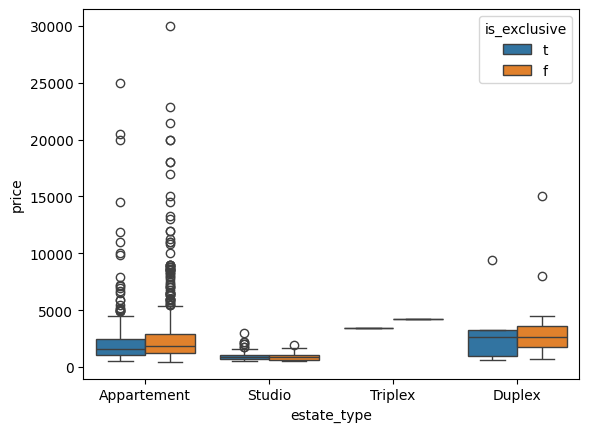

In [137]:
sns.boxplot(x = 'estate_type', y = 'price', hue = 'is_exclusive', data = new_data)

In [138]:
# mc = new_data.corr().round(2)
# sns.heatmap(mc, annot=True, cmap='coolwarm', fmt=".2f")
# #plt.figure(figsize=(20, 10))
# #sns.heatmap(m, annot = True)
# plt.show()

## Data preprocessing

In [139]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 94 to 4768
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1153 non-null   int64  
 1   tags                1153 non-null   object 
 2   rooms               1153 non-null   int64  
 3   price               1153 non-null   int64  
 4   is_exclusive        1153 non-null   object 
 5   highlighting_level  1153 non-null   int64  
 6   estate_type         1153 non-null   object 
 7   area                1153 non-null   float64
 8   address             1153 non-null   object 
 9   latitude            1153 non-null   float64
 10  longitude           1153 non-null   float64
 11  new_bedrooms_count  1153 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 117.1+ KB


In [140]:
new_data.head(2)

,id,tags,rooms,price,is_exclusive,highlighting_level,estate_type,area,address,latitude,longitude,new_bedrooms_count
94,3680995,"6 pièces, 4 chambres, 166 m², Étage 1/2, Terra...",6,4270,t,2,Appartement,164.230769,Saint-Germain-en-Laye,48.899041,2.094279,4
161,4118349,"3 pièces, 2 chambres, 69 m², Étage 5/5, Ascenseur",3,3000,f,2,Appartement,68.181818,Paris 8ème,48.867098,2.313122,2


#### Choix des encodeurs

In [141]:
# Donnée pour le modèle
model_data = new_data.drop(columns = ["id", "tags", "address", "highlighting_level"])

In [142]:
# Création des encodeurs
numeric_transformer = StandardScaler()
text_OHE = OneHotEncoder()

# Séparation des variables numériques des catégorielles
var_num = model_data.select_dtypes(include=['number'])
var_cat = model_data.select_dtypes(include=['object'])

# Création du préprocesseur pour appliquer les transformations aux colonnes appropriées

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_OHE, var_cat.columns),
        ('numeric', numeric_transformer, var_num.columns)
    ],
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

D'autre part, la recommandation doit ovrir une qualité acceptable, ce qui nécessite de détecter et de regrouper en amont les indicateurs les plus pertinents.

In [143]:
appartement = model_data[model_data["estate_type"] == "Appartement"]
duplex = model_data[model_data["estate_type"] == "Duplex"] 
studio = model_data[model_data["estate_type"] == "Studio"]
triplex = model_data[model_data["estate_type"] == "Triplex"]

## Algorithm selection

Plusieurs stratégies peuvent être adoptées face à un système de recommandation. Ils se divisent principalement en trois catégories :   
-$Basiques$ : En utilisant la similarité ou la popularité.  

-$Basés sur le contenu$ : Il se base sur des recommandation similaires aux gouts d'un utilisateurs  

-$Basés sur le collaboratif$ : Lui détecte les utilisateurs qui partagent le même goût pour les proposer des recommandation similaire.  

La catégorie $Basiques$ est mieux adapté aux données que nous disposons.

Nous allons essayer :  

Les algorithmes basiques qui sont la mesure cosine et la mesure distance euclidienne.  
Et l'algorithme KNN (K-Nearest Neighbors ), algorithme de type content-based et collaborative clustering qui permet de classier un objet en fonction de son voisinage.  

### Basique: Similarité avec cosine

In [144]:
# Préparation des données pour l'entraînement du modèle
X_transformed = pipeline.fit_transform(model_data)

In [145]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_apartments_cosine(client_preferences, X_transformed=X_transformed, df=new_data):
    type_appart = client_preferences["estate_type"]
    # Transformez les préférences du client avec le même préprocesseur
    
    client_input = pipeline.transform(pd.DataFrame(client_preferences, index=[0]))
    
    
    cosine_sim = cosine_similarity(client_input, X_transformed).flatten()
    

    # Trier les appartements par score de similarité 
    apartment_indices = cosine_sim.argsort()[::-1]
   
    # Renvoyer les détails des 5 appartements recommandés
    top_5 = df.iloc[apartment_indices][df.iloc[apartment_indices]['estate_type'] == type_appart].head(5)
    
    return top_5.drop(columns = ["id", "tags", "longitude", "latitude", "highlighting_level"])

In [146]:
from sklearn.metrics.pairwise import euclidean_distances

def recommend_apartments_euclidean_distances(client_preferences, X_transformed=X_transformed, df=new_data):
    
    type_appart = client_preferences["estate_type"]
    # Transformez les préférences du client avec le même préprocesseur
    client_input = pipeline.transform(pd.DataFrame(client_preferences, index=[0]))
   
    # Calcul de la distance euclidienne entre les préférences du client et les appartements
    distances = euclidean_distances(client_input, X_transformed).flatten()

    # Trier les appartements par score de similarité (plus petite distance euclidienne)
    apartment_indices = distances.argsort()

    # Renvoyer les détails des 5 appartements recommandés
    top_5 = df.iloc[apartment_indices][df.iloc[apartment_indices]['estate_type'] == type_appart].head(5)
    
    return top_5.drop(columns = ["id", "tags", "longitude", "latitude", "highlighting_level"])


In [147]:


knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')  # le nombre de voisins
knn_model.fit(X_transformed)

# Fonction de recommandation avec Nearest Neighbors
def recommend_apartments_knn(client_preferences, knn_model=knn_model, preprocessor=preprocessor, df = new_data):
    # Transformez les préférences du client avec le même préprocesseur
    client_input = preprocessor.transform(pd.DataFrame(client_preferences, index=[0]))

    # Trouvez les indices des appartements les plus proches
    _, indices = knn_model.kneighbors(client_input)

    # Renvoyer les détails des appartements recommandés
    recommended_apartments = df.iloc[indices.flatten()]
    # Vérifier si les préférences du client ne sont pas dans les données
    if len(recommended_apartments) == 0:
        return "Aucune recommandation disponible. Veuillez ajuster vos préférences."
    top_5 = recommended_apartments.drop(columns = ["id", "tags", "longitude", "latitude", "highlighting_level"])

    return top_5

In [148]:
import pickle

In [149]:
file = "knn_model.pkl"
with open(file, "wb") as knn:
    pickle.dump(knn_model, knn)

In [150]:
file =  "preprocessor.pkl"
with open(file, "wb") as pro:
    pickle.dump(preprocessor, pro)

In [151]:
file =  "new_data.pkl"
with open(file, "wb") as pro:
    pickle.dump(new_data, pro)

In [152]:
new_data.to_csv("new_data.csv", index = None)

In [153]:
# Données pour tester nos modèles

# Lieu choisi par le client
coord = coordonner(['Paris'])
lat = coord['Paris'][0]
long = coord['Paris'][1]

# Préférence par rapport au logement
client_preferences1 = {
'area'             :      180.722892,
'rooms'             :         7  ,
'price'            :        15000,
'is_exclusive'   : "f",
'new_bedrooms_count' : 3,
'estate_type' : "Appartement",
'longitude' : long,
'latitude' : lat
}


client_preferences2 = {
'area'             :      30,
'rooms'             :         1,
'price'            :        600,
'is_exclusive'   : "f",
'new_bedrooms_count' : 0,
'estate_type' : "Studio",
'longitude' : long,
'latitude' : lat
}


client_preferences3 = {
'area'             :      200,
'rooms'             :         5,
'price'            :        7000,
'is_exclusive'   : "f",
'new_bedrooms_count' : 3,
'estate_type' : "Duplex",
'longitude' : long,
'latitude' : lat
}


In [154]:
recommendations_cos = recommend_apartments_cosine(client_preferences1)
recommendations_eu = recommend_apartments_euclidean_distances(client_preferences2)
recommendations_knn = recommend_apartments_knn(client_preferences2)

display(recommendations_cos)
display(recommendations_eu)
display(recommendations_eu)

,rooms,price,is_exclusive,estate_type,area,address,new_bedrooms_count
3759,5,15000,f,Appartement,200.000000,Paris 8ème,3
3867,5,18000,f,Appartement,189.473684,Paris 7ème,3
3785,8,22888,f,Appartement,266.139535,Paris 8ème,5
3784,6,13280,f,Appartement,160.000000,Paris 8ème,4
3786,8,20000,f,Appartement,270.270270,Paris 8ème,5


,rooms,price,is_exclusive,estate_type,area,address,new_bedrooms_count
4354,1,836,f,Studio,25.333333,Malakoff,0
4431,1,977,f,Studio,27.138889,Paris 15ème,0
4340,1,937,f,Studio,26.771429,Paris 18ème,0
2450,1,802,f,Studio,22.277778,Paris 9ème,0
4734,1,924,f,Studio,33.000000,Asnières-sur-Seine,0


,rooms,price,is_exclusive,estate_type,area,address,new_bedrooms_count
4354,1,836,f,Studio,25.333333,Malakoff,0
4431,1,977,f,Studio,27.138889,Paris 15ème,0
4340,1,937,f,Studio,26.771429,Paris 18ème,0
2450,1,802,f,Studio,22.277778,Paris 9ème,0
4734,1,924,f,Studio,33.000000,Asnières-sur-Seine,0


## Evaluatation

In [155]:
#chercher les différences de distance

def evaluateur(client_preferences):
    
    recommendations_cos = recommend_apartments_cosine(client_preferences)
    recommendations_eu = recommend_apartments_euclidean_distances(client_preferences)
    recommendations_knn = recommend_apartments_knn(client_preferences)
    liste_recommandations = [recommendations_cos, recommendations_eu, recommendations_knn]
    
    room_diff_moy = []
    price_diff_moy = []
    area_diff_moy = []
    bedrooms_diff_moy = []
        
    for recommendations in liste_recommandations :
        room_diff = abs(recommendations["rooms"] - client_preferences["rooms"])
        room_diff_moy.append(room_diff.mean())

        price_diff = abs(recommendations["price"] - client_preferences["price"])
        price_diff_moy.append(price_diff.mean())

        area_diff = abs(recommendations["area"] - client_preferences["area"])
        area_diff_moy.append(area_diff.mean())

        bedrooms_diff = abs(recommendations["new_bedrooms_count"] - client_preferences["new_bedrooms_count"])
        bedrooms_diff_moy.append(bedrooms_diff.mean())

    diff = {"room_diff" : room_diff_moy, "price_diff" : price_diff_moy, "area_diff" : area_diff_moy,
        "bedrooms_diff" : bedrooms_diff_moy}
    
    return pd.DataFrame(diff, index = ['Cosine similarity','Euclidean distances ','Nearest Neighbors'])

In [156]:
difference1 = evaluateur(client_preferences1)
difference2 = evaluateur(client_preferences2)
difference3 = evaluateur(client_preferences3)

In [157]:
print("Evaluation de performance des propositions au premier client")
display(difference1)

print("Evaluation de performance des propositions au second client")
display(difference2)

print("Evaluation de performance des propositions au troisième client")
display(difference3)

Evaluation de performance des propositions au premier client


,room_diff,price_diff,area_diff,bedrooms_diff
Cosine similarity,1.4,3521.6,44.742963,1.0
Euclidean distances,1.6,1144.0,26.795613,0.4
Nearest Neighbors,1.4,1044.0,12.940191,0.4


Evaluation de performance des propositions au second client


,room_diff,price_diff,area_diff,bedrooms_diff
Cosine similarity,0.0,295.2,4.295714,0.0
Euclidean distances,0.0,295.2,4.295714,0.0
Nearest Neighbors,0.0,295.2,4.295714,0.0


Evaluation de performance des propositions au troisième client


,room_diff,price_diff,area_diff,bedrooms_diff
Cosine similarity,0.8,3435.2,33.066692,0.6
Euclidean distances,0.4,2325.2,37.711270,0.4
Nearest Neighbors,0.6,1080.0,9.189818,0.2
